# RBC model


> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [25]:
# 1. We import the packages
import numpy as np
from scipy import optimize
import sympy as sm
import pandas as pd
import matplotlib as plt

# Autoreloads modules when code is run
#%load_ext autoreload
#%autoreload 2

# We import the local modules
from modelproject import RealBusinessCycleModel

# Model description

**RBC Model Setup - Assumptions** 

- Time is discrete,  $t\in\{0,1,2, \dots\}$.

- Large numbers of identical price-taking firms.

- Large numbers of indentical price-taking households.

- Households are infinitely lived.

**The benevolent social planner solves the optimal growth problem:**
$c_t$ is consumption, $l_t$ is leisure for the household, $n_t$ is hours worked, $l_t$ is leisure, and $k_t$ is capital.

\begin{aligned}
    \max_{\{c_t,n_t,k_{t+1}\}^{\infty}_{t=0}} &\mathbb{E}_0 \sum^{\infty}_{t=0} \beta^t u\left(c_t, n_t\right), \quad \beta \in (0,1) \\

    &\text{s.t.}\\
    
\end{aligned}

Workhours-leisure constraint: 

\begin{aligned}
n_t + l_t = 1
\end{aligned} \\

Technology:

\begin{aligned}

 y_t &= A_t F(k_t,n_t) 

\end{aligned} \\

The resource constraint:

\begin{aligned}

 y_t &=c_t+i_t  

\end{aligned} \\

Capital akkumulation:
\begin{aligned}
k_{t+1} &=i_t+(1-\delta)k_t 
\end{aligned}

The production function is Cobb-Douglas:
\begin{aligned}
F(k_t,n_t) = k_t^\alpha n_t^{1-\alpha}
\end{aligned}

The utility function:

\begin{aligned}
u(c_t,n_t)=log(c_t)+\psi l_t
\end{aligned}

The Lagrangian:

\begin{aligned}
L &= \mathbb{E}_0\left[ \sum^{\infty}_{t=0} \beta^t u\left(c_t, n_t\right) + \lambda_t \beta^t (A_t F(k_t,n_t)+(1-\delta)k_t-c_t-k_{t+1}+\omega_t\beta^t(1-l_t-n_t))\right]

\end{aligned}

**First-Order Conditions** 




## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

### Linear approxmiations

Before we can numerically solve the model then we need to *log linearize* around the steady state. This is because the RBC model is a non-linear model then we have to linerazise around the Steady State. Otherwise, it will be harder to solve numerically.

In addition, we *log linearize* because it is easier to interpret percentages instead of units. Before we move on, the theory behind linear approxmiation is introduced to make sure the process is clear. The theory is from Alexandre Kohlhas' Macroeconomics III slides.

The total derivative of $f(x)$ at the steady state level for a vector of variables $x = x_t^*$:

\begin{aligned}
    \text{df}(x_t) = \sum^n_{j=1} \dfrac{\partial f(x_t)}{\partial x_j}_{|x_t=x^*} dx_j
\end{aligned}

So, total differentiation is approxmiately a Taylor approximation of first-order.

### Log-Linearization

The change in our variables is given by:
\begin{aligned}
    f(x_t) &= f(y_t, c_t, i_t, n_t, l_t, k_t)\\
    &= f(\exp^{\log\left(y_t\right)}, \exp^{\log\left(c_t\right)}, \exp^{\log\left(i_t\right)}, \exp^{\log\left(n_t\right)}, \exp^{\log\left(l_t\right)}, \exp^{\log\left(k_t\right)})
\end{aligned}

\begin{aligned}
    df(x_t) = \sum^n_{j=1} \left(\dfrac{\partial f(x_t)}{\partial x_j} \cdot \exp^{\log\left(x_j\right)}_{|x_t = x^*}\right) \cdot d \log{\left(x_j\right)}
\end{aligned}

\begin{aligned}
    \begin{pmatrix}
        \psi c_t\\
        \dfrac{1}{c_t}\\
        y_t\\
        y_t\\
        k_{t+1}\\
        1
    \end{pmatrix} = \begin{pmatrix} 
        (1 - \alpha) z_t \left(\dfrac{k_t}{n_t}\right)^{\alpha}\\
        \beta \mathbb{E}_t \left[\dfrac{1}{c_{t+1}}\left(\alpha A_{t+1} \left(\dfrac{k_{t+1}}{n_{t+1}}\right)^{\alpha-1}\right) + (1 - \delta)\right]\\
        A_t k_t^{\alpha}n_t^{1-\alpha}\\
        y_t = c_t + i_t\\
        (1-\delta)k_t + i_t\\
        1 + l_t + n_t
    \end{pmatrix}
\end{aligned}

To numerically solve the RBC model, we define a system of variables:

\begin{aligned}
    x_t &= \begin{pmatrix} 
    \text{Output}\\
    \text{Consumption}\\
    \text{Investment}\\
    \text{Labour}\\
    \text{Leisure}\\
    \text{Capital}\\
    \end{pmatrix}\\ 
    &= \begin{pmatrix}
    y_t \\
    c_t\\
    i_t\\
    n_t\\
    l_t\\
    k_t\\
    \end{pmatrix}
\end{aligned}

Next, we define a paramter space, $\Theta$:

\begin{aligned}
    \Theta = \begin{pmatrix} 
        \text{Discount rate}\\
        \text{Marginal disutility of labour}\\
        \text{}
        \text{Capital-share of output}\\
    \end{pmatrix}
\end{aligned}

### Root finding algorithm

\begin{aligned}
    f(x_{t+1}, x_t) = 0
\end{aligned}

\begin{aligned}
    \log{\left(f_1\left(\exp^{\log{(x_{t+1})}}, \exp^{\log{(x_t)}}\right)\right)} - \log{\left(f_2\left(\exp^{\log{(x_{t+1})}}, \exp^{\log{(x_t)}}\right)\right)} = 0
\end{aligned}

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

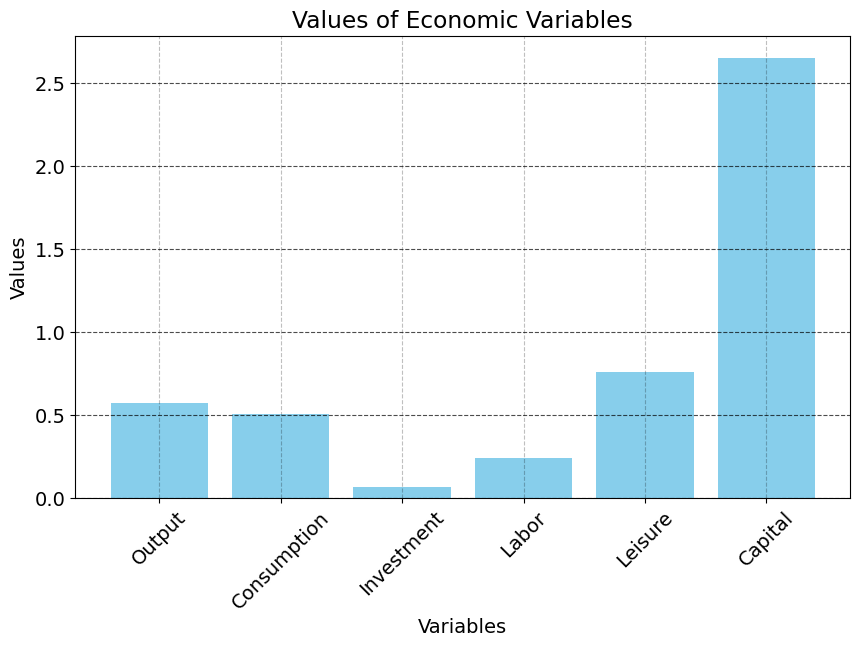

In [20]:
import matplotlib.pyplot as plt  # Import the matplotlib library
# 1.
variables = ['Output', 'Consumption', 'Investment', 'Labor', 'Leisure', 'Capital']
steady_state_values = [0.572, 0.506, 0.0663, 0.241, 0.759, 2.65]

# 2.
plt.figure(figsize=(10, 6))
plt.bar(variables, values, color='skyblue')
plt.title('Values of Economic Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for y-axis
plt.show()

In [26]:
# 1. We save the names of the equations
equations = [
    'static FOC', 'euler equation', 'production',
    'aggregate resource constraint', 'capital accumulation',
    'labour-leisure'
]

# 2. Saves the names for the variables
variables = [
    'output', 'consumption', 'investment',
    'labour', 'leisure', 'capital'
]

# 3. Saves the names for the parameters
parameters = [
    'discount rate', 'marginal disutility of labor',
    'depreciation rate', 'capital share', 'technology'
]

# 4. Stores a symbol for each variable
symbols_for_the_variables = [
    r"y", r"c", r"i", r"n", r"l", r"k"
]

# 
this_period_variable_symbols = [
    r"$%s_t$" % symbol for symbol in symbols_for_the_variables
]

# 
next_period_variable_symbols = [
    r"$%s_{t+1}$" % symbol for symbol in symbols_for_the_variables
]

# 
parameter_symbols = [
    r"$\beta$", r"$\psi$", r"$\delta$", r"$\alpha$"
]

In [28]:
# Setup fixed parameters
parameter_values = pd.DataFrame({
    'name': parameters,
    'value': [0.9, 3, 0.1, 1/3, 1]
})
parameters.T

AttributeError: 'list' object has no attribute 'T'

In [27]:
rbc_model = RealBusinessCycleModel(parameter_values)

result = rbc_model.logged_RBC(log_next_period, log_this_period)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Anton\anaconda3\Lib\site-packages\pandas\core\indexes\base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 0

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\Anton\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Anton\AppData\Local\Temp\ipykernel_22368\2948064422.py", line 1, in <module>
    rbc_model = RealBus

In [ ]:
numericsolution = NumericalSolution(parameters['value'])

steady_state_values = pd.DataFrame({
    'value': numericsolution.steady_state_numeric()
}, index=variable_names)

steady_state.T

In [ ]:

# Instantiate the class with parameters
numerical_solution = NumericalSolution(params)

# Compute the steady state numerically
steady_state = numerical_solution.steady_state_numeric()

\begin{aligned}
    [\alpha K_t^{\rho} + (1 - \alpha )L^{\rho}]^{\dfrac{1}{\rho}}
\end{aligned}

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion